# Atividade vivencial - Aprendizado supervisionado

Neste notebook, realizaremos a implementação de redes neurais do tipo Multilayer Perceptron (MLP) utilizando a biblioteca [Keras](https://keras.io). Na primeira parte, veremos a implementação de uma MLP para uma tarefa de classificação. Na segunda parte veremos outra MLP, mas desta vez para uma tarefa de regressão. Em ambos os casos, o objetivo é entender como estes algoritmos funcionam. Ao final, você deverá realizar os exercícios propostos.

## Parte 1 - Tarefa de classificação (XOR lógico)

Para começar, precisamos importar algumas bibliotecas básicas: `numpy` para lidar com operações numéricas, `matplotlib` para criar gráficos e `keras` para criar redes neurais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

/Users/diogo/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Nesta primeira parte, nosso objetivo é implementar uma rede MLP capaz de resolver a operação lógica XOR. Para isto, utilizaremos a tabela verdade desta operação (abaixo) como dataset para treinar a rede neural.

A | B | XOR
- | - | -
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 0

Em particular, utilizaremos as colunas A e B como entradas da rede neural e a coluna XOR como saída. Especificamente, cada amostra do dataset será composta por uma entrada X (par de dois valores representando A e B) e por uma saída y (valor individual representando a operação XOR sobre os valores A e B). Um exemplo de amostra seria X=(0,1) e y=1, representando a segunda linha da tabela acima.

Seguindo a lógica acima, podemos codificar a tabela do XOR na forma de dois arrays do NumPy, conforme abaixo.

In [2]:
# entradas e saídas referentes à operação lógica XOR
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]]).astype('float32')
y = np.array([[0],
              [1],
              [1],
              [0]]).astype('float32')

Resolveremos a tarefa acima como um problema de classificação. Desta forma, é conveniente codificar a saída de forma categórica (mais detalhes sobre este tipo de procedimento [aqui](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)). 

In [3]:
# codifica as saídas de forma categórica
y = to_categorical(y)

Neste tipo de codificação, ao invés de termos uma saída que assume um valor para cada uma das `n` classes possíveis, temos um vetor de `n` posições contendo 0s e 1s. Neste vetor, todas as posições assumem valor 0, exceto uma delas, onde o valor 1 vai denotar que o vetor em questão representa a classe da posição onde o 1 está. Na categorização acima, os valores 0 e 1 são representados por [1, 0] e [0, 1], respectivamente. Isto fica evidente ao imprimir a variável.

In [4]:
print(y)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Nosso próximo passo consiste em construir a rede neural. Para isto, utilizaremos o modelo `Sequential` do Keras. Neste modelo, podemos empilhar as diferentes camadas da rede com bastante facilidade.

In [5]:
# cria um modelo sequencial
model = Sequential()

Após criar o modelo sequencial, podemos empilhar as camadas utilizando a função `add`. Primeiramente, criaremos uma camada de 16 neurônios do tipo perceptron. Isto pode ser feito através da classe `Dense`. Ao criar esta camada, é preciso especificar o número de neurônios que devem ser criados e a função de ativação. No nosso caso, utilizaremos a função de ativação do tipo tangente hiperbólica. Finalmente, é preciso especificar a dimensão das entradas através do parâmetro `input_dim`.

In [6]:
# 1a camada: 16 neurônios com a mesma entrada com tamanho compatível com a entrada
model.add(Dense(16, activation='tanh', input_dim=X.shape[1]))

/Users/diogo/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ao final, criaremos uma camada de saída. Considerando que nossas saídas são categóricas, cada qual de dimensão 2, nossa rede também precisa ter duas saídas. Desta forma, criaremos uma camada de saída com dois neurônios, cada qual com uma função de ativação do tipo sigmoide. Note que nesta camada não foi preciso definir a dimensão de entrada; isto acontece porque o Keras define automaticamente a dimensão de entrada dos neurônios de uma camada oculta com base nas saídas da camada anterior.

In [7]:
# 2a camada (saída): 2 neurônios, totalmente conectada
model.add(Dense(2, activation='sigmoid'))

Definida a rede, agora podemos compilar a mesma para gerar o modelo final. Na compilação, devemos definir o algoritmo otimizador (`optimizer`) que será utilizado para treinar a rede bem como a função de erro (`loss`) e as métricas de avaliação (`metrics`). O Keras possui diversos algoritmos de otimização ([lista](https://keras.io/api/optimizers/)), funções de erro ([lista](https://keras.io/api/losses/)) e métricas ([lista](https://keras.io/api/metrics/)). No nosso caso, estamos utilizando uma função de erro e métricas próprias para a tarefa de classificação. Para otimização, utilizaremos o `adam`, que é um excelente otimizador para redes neurais.

In [8]:
# compila o modelo, utilizando a entropia cruzada como função de erro, 
# com o algoritmo Adam, e avaliando o modelo através da métrica acurácia
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['binary_crossentropy', 'accuracy'])

Para ter uma visão geral do modelo resultante, podemos imprimir um resumo do mesmo. Note que o modelo criado possui 82 parâmetros. Isto significa que, durante o treinamento, o algoritmo de otimização terá que ajustar o valor de 82 coeficientes da rede de modo a reduzir o erro de classificação.

In [9]:
# mostra um resumo do modelo compilado
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

Definidos os dados e a rede, agora podemos iniciar o treinamento. Para isto, devemos utilizar a função `fit`, especificando os dados de entrada e saída (no nosso caso, `X` e `y`) e o número de épocas (`epochs`).

In [10]:
# treina o modelo
history = model.fit(X, y, epochs=1000, verbose=0) 

No código acima, armazenamos o retorno do treinamento na variável `history` para poder visualizar a evolução do processo de treinamento. Para isto, podemos plotar o erro ao longo do tempo como segue.

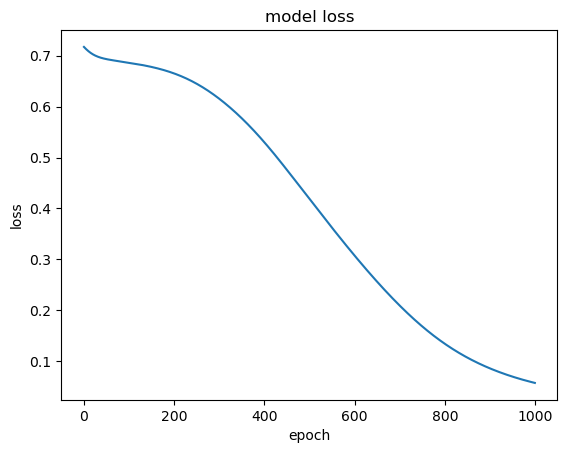

In [11]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

Conforme pode ser observado, o erro final é bastante baixo. No entanto, ele só chega a níveis adequados no final do treinamento. 

Da mesma forma que fizemos com o erro, podemos plotar também a acurácia do modelo.

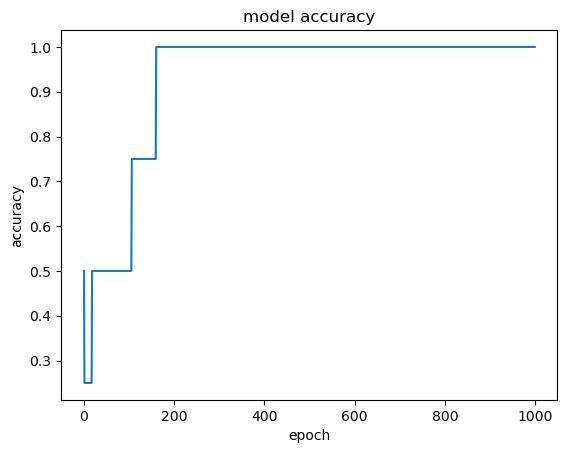

In [12]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

Bem como anteriormente, note que a acurácia melhora conforme o modelo avança no treinamento.

Finalmente, agora podemos avaliar nosso modelo. Para isto, utilizaremos a função `evaluate`, que recebe como argumentos dados de entrada (`X`) e saída (`y`) e retorna as métricas anteriormente definidas. Além disso, podemos realizar algumas predições para ver como o modelo se comporta.

In [13]:
# avalia o modelo
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict(X)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - binary_crossentropy: 0.0572 - loss: 0.0572

Acurácia:  1.0

Predições:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.94881135 0.04367547]
 [0.05995088 0.94948703]
 [0.07291593 0.955574  ]
 [0.9264628  0.04765606]]


Note que nosso modelo obteve uma acurácia de 100%. Nenhuma surpresa, dado que o problema XOR é bastante simples. Note que as predições fornecidas pela rede são vetores com números reais, ou seja, não temos apenas 0s e 1s como queríamos. No entanto, observe que um valor é sempre bem maior que outro. Podemos interpretar isto como sendo a probabilidade da referida entrada pertencer a uma dada classe: quando o primeiro valor é maior, significa que o modelo está classificando a entrada como sendo da classe 0; já quando o segundo valor é maior, significa que modelo entende a entrada como pertencendo à classe 1.

Para melhorar o entendimento, podemos arredondar as saídas do modelo e comparar as mesmas com as saídas esperadas.

In [14]:
# imprime as predições de forma mais clara
print("Entrada\t\tSaída esperada\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t{[round(v) for v in pred[i]]}")

Entrada		Saída esperada	Saída prevista
[0. 0.]		[1. 0.]		[1, 0]
[0. 1.]		[0. 1.]		[0, 1]
[1. 0.]		[0. 1.]		[0, 1]
[1. 1.]		[1. 0.]		[1, 0]


## Parte 2 - Tarefa de regressão (Boston Housing)

Novamente, começaremos importando algumas bibliotecas.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.datasets import boston_housing

Nesta segunda parte, resolveremos a tarefa de regressão. Para isto, utilizaremos o dataset [Boston Housing](https://keras.io/api/datasets/boston_housing/), que contém informações sobre imóveis e seus preços na cidade de Boston (EUA). Este dataset pode ser facilmente importado através da função `boston_housing.load_data`, a qual retorna duas tuplas, cada uma representando os dados de treino (entrada e saída) e de teste (entrada e saída). Neste dataset, as entradas são representadas por 13 features regionais (como taxa de crimes na região, quantidade de quartos, idade, distância até o centro, etc.) e as saídas são valores únicos (representando o valor dos referidos imóveis).

In [17]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


Para entender melhor estes dados, podemos imprimir uma pequena amostra como segue.

In [18]:
print('Shape dados de treino:   %s'% (train_data.shape,))
print('Shape dados de teste:    %s'% (test_data.shape,))
print('Exemplo de entrada:      %s'% (train_data[0]))
print('Exemplo de saída:        %f'% (train_targets[0]))

Shape dados de treino:   (404, 13)
Shape dados de teste:    (102, 13)
Exemplo de entrada:      [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Exemplo de saída:        15.200000


Antes de iniciarmos a criação da rede neural, é necessário analisar os dados. Um bom ponto de partida é criar um gráfico da distribuição de valores de cada feature. Isto pode ser feito através de histogramas, como abaixo.

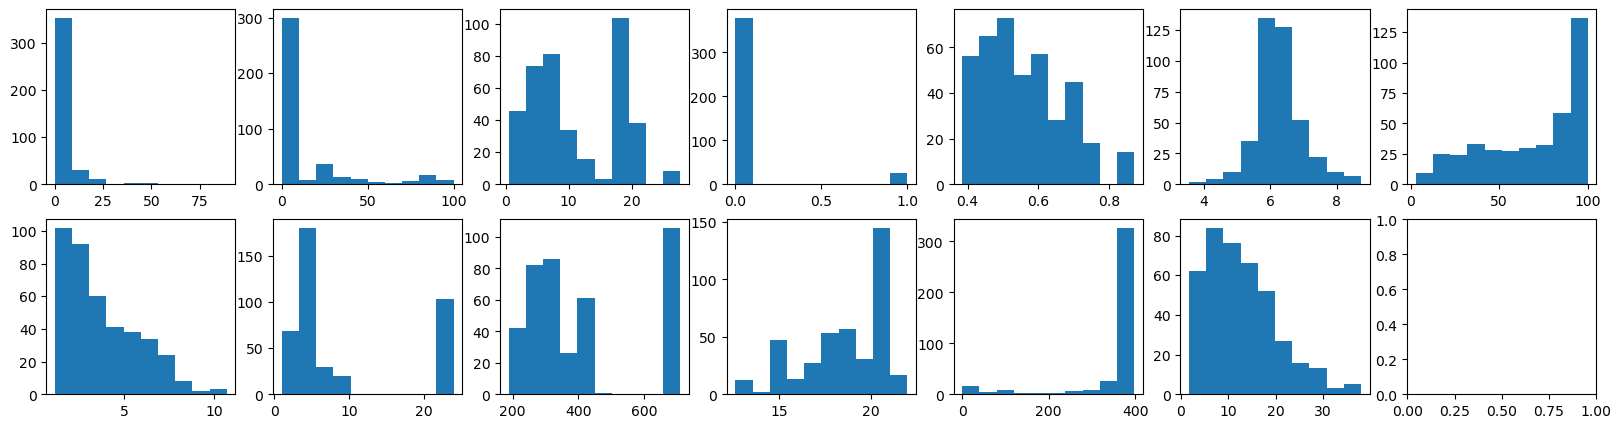

In [19]:
# histogramas separados
fig, axs = plt.subplots(2, 7, figsize=(20,5))
for i in range(len(train_data[0])):
  axs[int(i/7), i%7].hist(train_data[:,i])
plt.show()

Analisando os histogramas acima, pode-se observar que cada feature possui um intervalo de valores diferente. Algumas entre 0 e 100, outras entre 200 e 800, e por aí vai. O hgráfico abaixo une todos os histogramas acima em um único gráfico. Como podemos observar, cada distribuíção tem um padrão diferente.

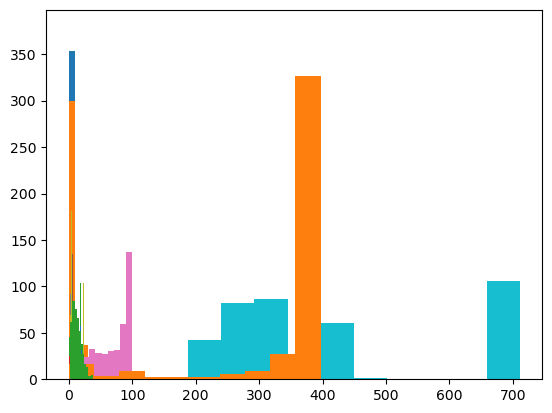

In [20]:
# histogramas agrupados
for i in range(len(train_data[0])):
  plt.hist(train_data[:,i])

O fato das features possuírem distribuições tão diferentes tende a dificultar o treinamento de uma rede neural. Desta forma, para que o modelo aprenda melhor, precisamos realizar um pré-processamento dos dados. Em particular, faremos a normalização dos dados utilizando o [z-score](https://en.wikipedia.org/wiki/Standard_score), que deixa os valores com média 0 e desvio padrão 1. Isto deve facilitar o treinamento da rede neural.

In [21]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Após a normalização, podemos gerar os histogramas novamente. Aqui, podemos observar que todas as features possuem distribuições mais parecidas, onde a média passa a ser 0 e o desvio padrão passa a ser 1. O histograma agrupado mostra que, de fato, a normalização conseguiu padronizar as features.

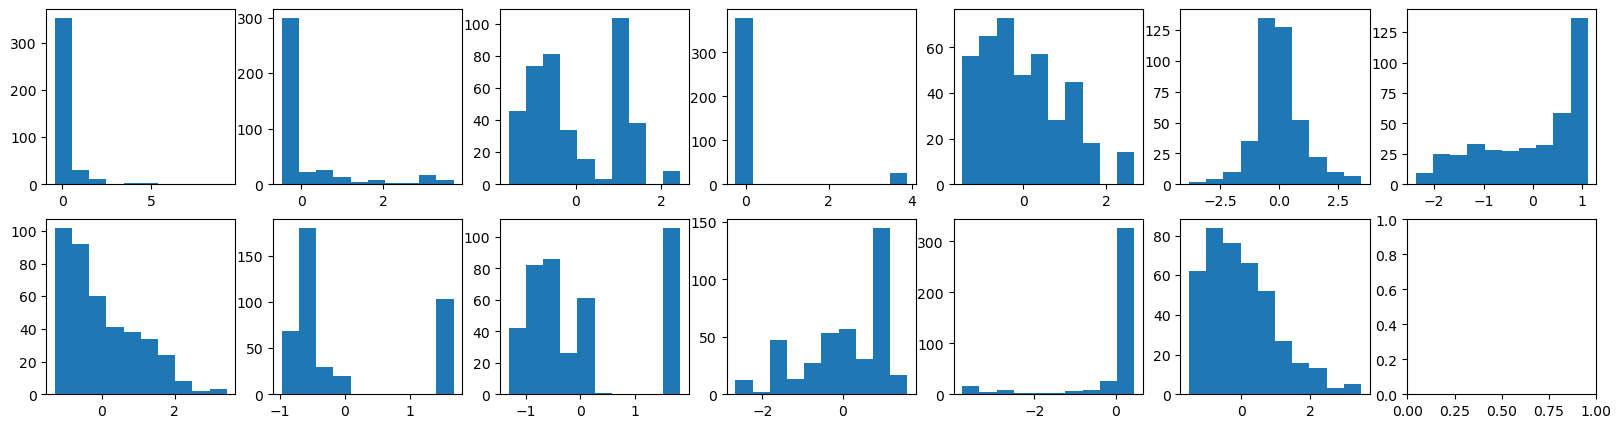

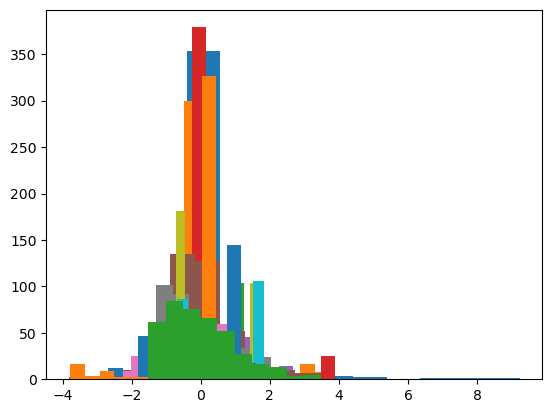

In [22]:
# histogramas separados
fig, axs = plt.subplots(2, 7, figsize=(20,5))
for i in range(len(train_data[0])):
  axs[int(i/7), i%7].hist(train_data[:,i])
plt.show()

# histogramas agrupados
for i in range(len(train_data[0])):
  plt.hist(train_data[:,i])

Definido o dataset, agora podemos criar a rede neural.

Neste exemplo, empilharemos três camadas, sendo duas com 64 neurônios cada e uma (de saída) com apenas um neurônio. Note que a camada de saída possui apenas um neurônio porque estamos lidando com a tarefa de regressão. 

Em termos de função de ativação, estamos utilizando a função ReLU para as camadas ocultas. Isto facilita o processo de treinamento e evita a fuga do gradiente. Já na camada de saída, como estamos fazendo regressão, deixamos uma função de ativação identidade (ou linear).

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

Criado o modelo, podemos compilá-lo. Desta vez, utilizaremos o otimizador RMSprop para treinar nossa rede. Em termos de função de perda, utilizaremos o erro médio quadrado, que é uma métrica própria para regressão.

In [24]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Note que, como esta rede possui mais camadas que a rede criada na parte 1 deste notebook, nosso modelo aqui é bem maior, possuindo 5121 parâmetros. 

Agora podemos treinar o modelo utilizando nosso dataset.

In [25]:
history = model.fit(train_data, train_targets, validation_data=(test_data, test_targets), epochs=100, verbose=0)

Treinado o modelo, podemos analisar seu desempenho através do gráfico abaixo.

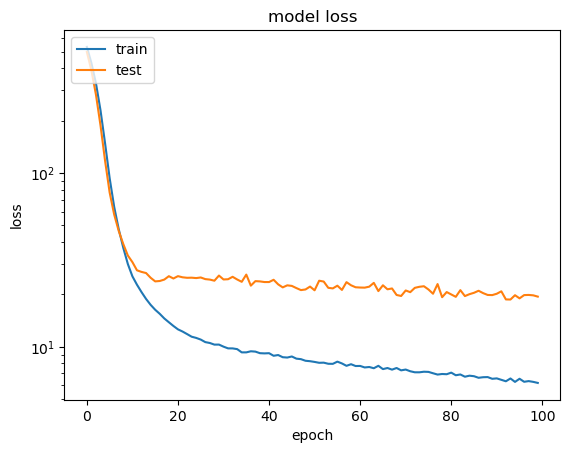

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Para avaliar o modelo, podemos obter o valor do erro como segue.

In [27]:
# avalia o modelo
score = model.evaluate(test_data, test_targets)
print("\nMSE: ", score[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.3152 - mse: 13.3152

MSE:  19.4012508392334


Note que o erro acima está alto. Mas ainda assim, é uma aproximação razoável.

Podemos ter uma ideia melhor deste erro através do gráfico abaixo. No gráfico, cada ponto representa uma amostra do dataset. Quanto mais distante o ponto está da linha, maior o erro.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


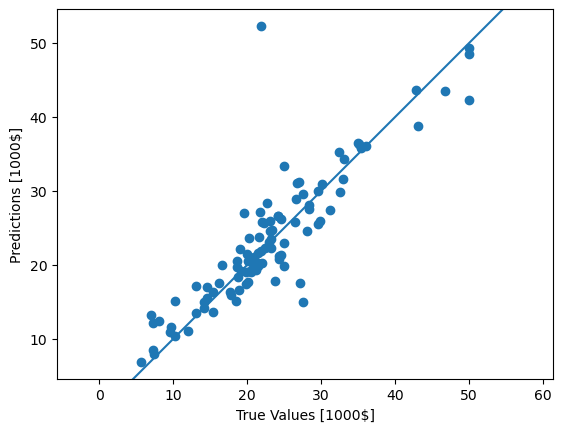

In [28]:
test_predictions = model.predict(test_data).flatten()
plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100],[-100,100])

## Exercícios

### Exercício 1

Repita o exemplo 1 para a expressão lógica abaixo. 

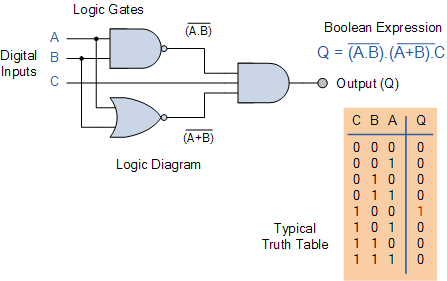

In [29]:
# Passo 1: criação e preparação dos dados
X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]]).astype('float32')
y = np.array([[0],[0],[0],[0],[1],[0],[0],[0]]).astype('float32')
y = to_categorical(y)

In [30]:
#@title Passo 2: criação e treinamento da rede neural
model = Sequential()
model.add(Dense(16, activation='tanh', input_dim=X.shape[1]))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["binary_crossentropy", "accuracy"])
model.summary()
history = model.fit(X, y, epochs=1000, verbose=0) 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98 (392.00 B)

 Trainable params: 98 (392.00 B)

 Non-trainable params: 0 (0.00 B)

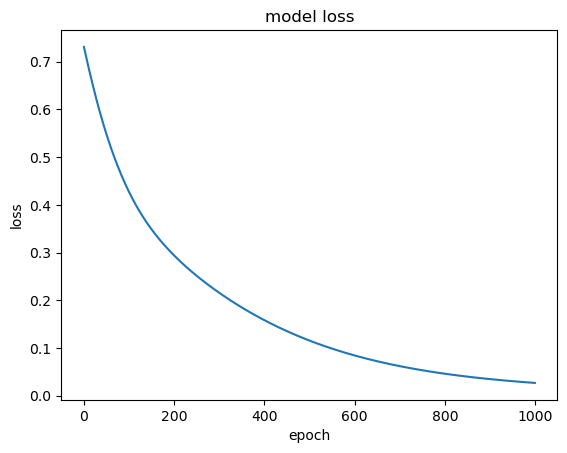

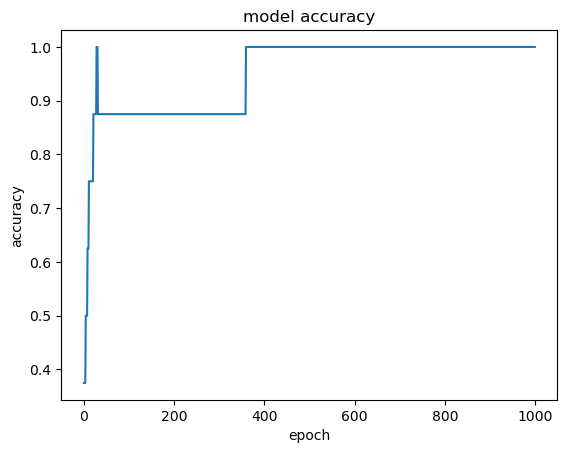

In [31]:
#@title Passo 3: geração dos gráficos
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [32]:
#@title Passo 4: avaliação dos resultados

# avalia o modelo
score = model.evaluate(X, y)
print("\nAcurácia: ", score[-1])

# verifica as predições
print("\nPredições:")
pred = model.predict(X)
print(pred)
# imprime as predições de forma mais clara
print("Entrada\t\tSaída esperada\tSaída prevista")
for i in range(len(X)):
    print(f"{X[i]}\t\t{y[i]}\t\t{[round(v) for v in pred[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 1.0000 - binary_crossentropy: 0.0269 - loss: 0.0269

Acurácia:  1.0

Predições:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.6744299e-01 5.2722353e-02]
 [9.9951428e-01 1.3265595e-03]
 [9.9934816e-01 1.6738992e-03]
 [9.9990278e-01 2.9839197e-04]
 [7.0727587e-02 8.8707048e-01]
 [9.7366005e-01 3.8076084e-02]
 [9.7239196e-01 4.8146579e-02]
 [9.9951583e-01 1.4380702e-03]]
Entrada		Saída esperada	Saída prevista
[0. 0. 0.]		[1. 0.]		[1, 0]
[0. 0. 1.]		[1. 0.]		[1, 0]
[0. 1. 0.]		[1. 0.]		[1, 0]
[0. 1. 1.]		[1. 0.]		[1, 0]
[1. 0. 0.]		[0. 1.]		[0, 1]
[1. 0. 1.]		[1. 0.]		[1, 0]
[1. 1. 0.]		[1. 0.]		[1, 0]
[1. 1. 1.]		[1. 0.]		[1, 0]


### Exercício 2

Construa um modelo capaz de fazer o reconhecimento de dígitos do dataset MNIST ([link](https://keras.io/api/datasets/mnist/)). 

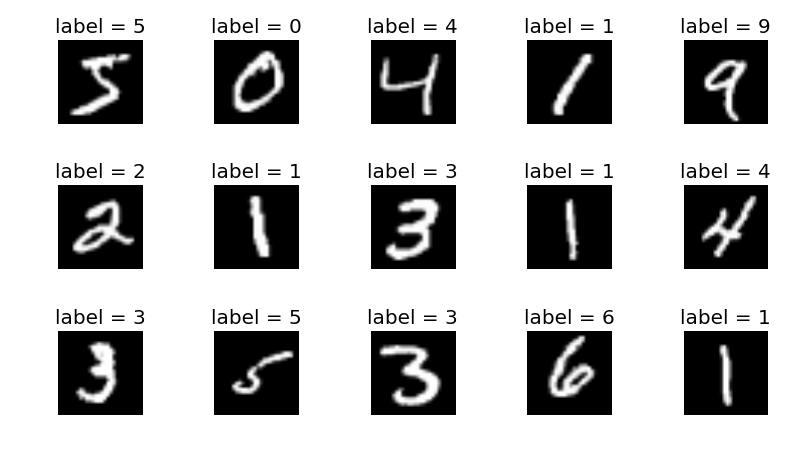


**Dica 1**: as imagens do MNIST são formadas por matrizes com valores entre 0 e 255. Como normalização, é possível dividir o valor dos pixels por 255. Assim, todos os pixels terão valores entre 0 e 1. Não precisamos do z-score aqui.


**Dica 2**: para trabalhar com imagens em uma MLP, é preciso converter as entradas de matrizes (ou cubos) para vetores. Isto pode ser feito adicionando a camada `Flatten(input_shape=(28, 28))` no início do modelo `Sequential`. Não esqueça de importar a camada usando `from keras.layers.core import Flatten`.

In [ ]:
#@title Passo 1: importar bibliotecas
from keras.datasets import mnist
from keras.layers.core import Flatten

In [ ]:
# Passo 2: importar o dataset
(train_data, train_targets), (test_data, test_targets) = #TODO: your code here (1 line)

num_classes = #TODO: your code here (1 line)

train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

train_targets = to_categorical(train_targets, num_classes)
test_targets = to_categorical(test_targets, num_classes)

In [ ]:
# Passo 3: criar a rede neural
model = Sequential()
#TODO: adicionar camada Flatten (1 linha)
#TODO: adicionar demais camadas (2~3 linhas)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# Passo 4: treinar a rede neural
history = model.fit(train_data, train_targets, epochs=20, batch_size=128, validation_data=(test_data, test_targets), verbose=1)

In [ ]:
#@title Passo 5: gerar os gráficos
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
#@title Passo 6: avaliar os resultados
score = model.evaluate(test_data, test_targets, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])